# Présentation de 5B1C

iReaz est un Youtubeur principalement centré sur le jeu League of Legends (abbrégé en LoL) qui s'est un jour posé une question intéressante : "Est-ce que un seul joueur de LoL challenger pourraient vaincre 5 joueurs débutants dans une partie classique ?". Pour répondre à  cette question, Ireaz a réuni des jours bronzes et des clahhenger (les meilleurs joueurs du jeu constituant X% des joueurs de Lol)


Une longueur série de vidéo a alors débuté POUR R2PONDRE A CETTE QUESTIONS et est disponible ici : PLAYLIST
Au tout début, tout portait à croire que les joueurs débutant se feraient vaincre facilement contre le joueur très expérimenté. Cependant, les nombreuses vidéo sur ce concept tendant à démontrer fortement l'inverse. En effet, sur X tentatives, moins de 10 joueurs ont réussi le challenge montrant à quel point c'est difficile.


5B1C (abbréviation de 5 bronzes 1 challenger) est un projet qui vise à analyser les parties de League of Legends de ce concept de vidéo pour en tirer des informations intéressantes permettant de faciliter la réussite de ce challenge. Une base de données à été créée et se base sur 6 victoires et XX défaites.





## L'analyse commence dès maintenant par l'importation des librairies nécessaires

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Librairie faites pour cette étude
import librarie as lib

## Paramètres d'affichage des catalogues de données
lib.display_parameters(pd)

## Importations des catalogues de données

Deux catalogues de données vont être importés à savoir, celui contenant les parties victorieuses et celui contenant les parties perdantes

In [2]:
victoire = pd.read_csv("donnees/victoire.csv")
defaite = pd.read_csv("donnees/defaite.csv")

## Transformer en liste Python les ensembles de données dans les colonnes des catalogues
list_columns = ["Temps numérique", "Temps numérique objets", "Kill", "Mort", "CS", "Temps objets", "Objets"]
victoire, defaite = lib.repair_list_in_df(victoire, defaite, list_columns)

## Observations des statistiques

De nombreuses données ont été extraites des parties à savoir : 
- Le nom du joueur réalisant le défi
- Son élo
- La durée de la partie
- Son KDA à la fin de la partie
- Le nombre de tours perdues
- Le nombre d'inibiteur perdus
- Le nombre de tours détruites par le joueur
- Le nombre d'inibiteur détruits par le joueur
- Le cs/min	à la fin de la partie
- Le nombre d'or total
- Le gold/min à la fin de la partie
- Le temps de la première mort (du joueur ou des adversaires)
- Le nombre de kill évoluant au fil de la partie
- Le nombre de mort évoluant au fil de la partie
- Le nombre de CS évoluant au fil de la partie
- Le nombre de personnages avec des controles de foule
- Le summoner 1	du joueur
- Le summoner 2	du joueur
- Le temps d'obtention des objets		

## Comparaison entre la durée de la partie et le nombre de kill du joueur



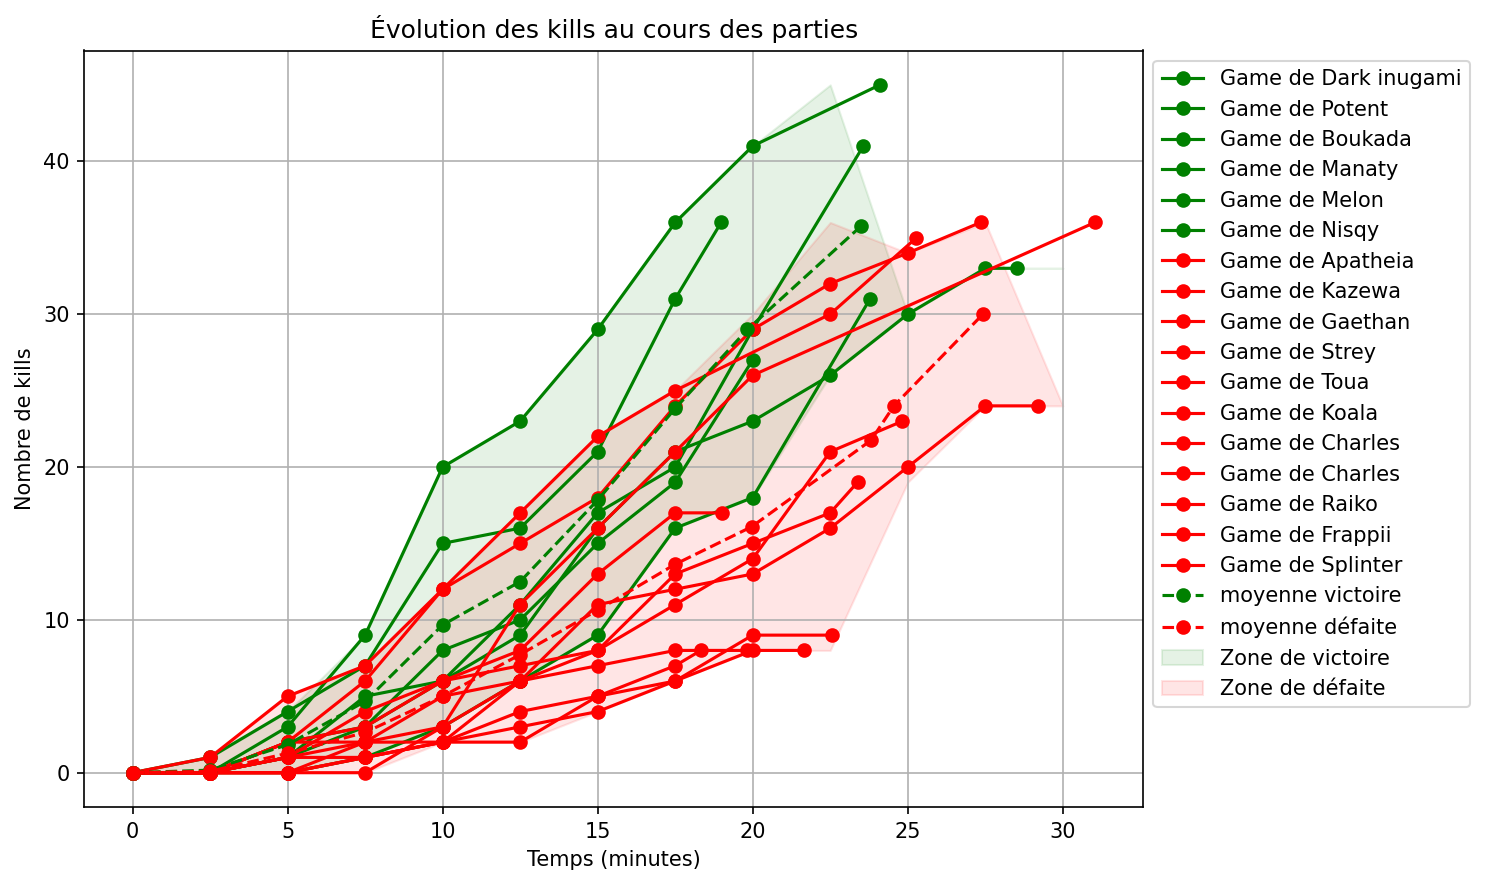

In [3]:
lib.plot_colonnes(victoire, defaite, "Kill", 'Nombre de kills', plot_game = False)

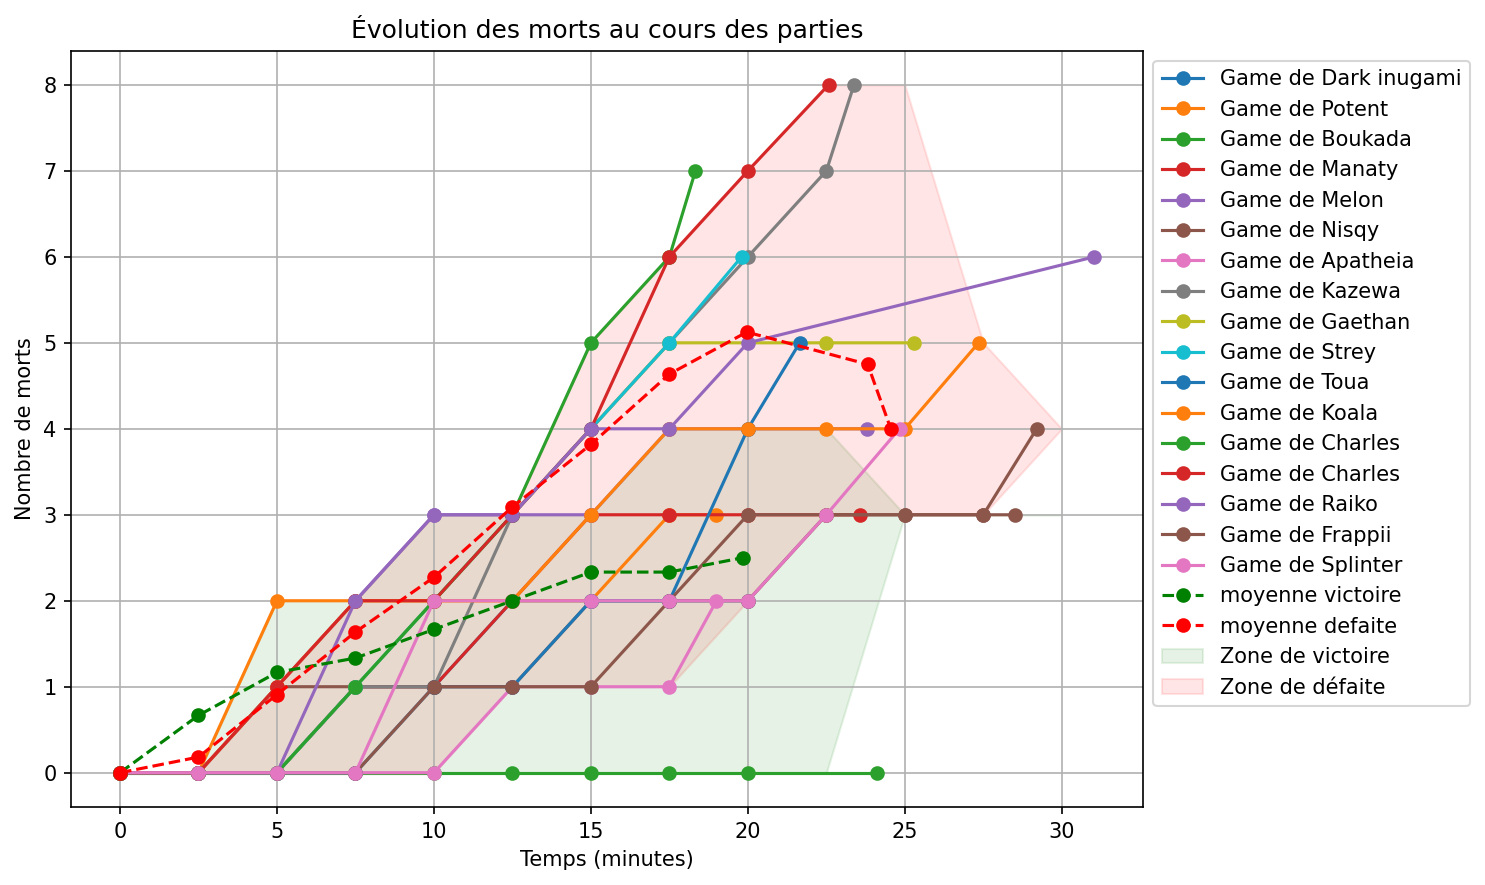

In [4]:
plt.figure(figsize=(10,6),dpi=150)

for index_game, game in victoire.iterrows():
    plt.plot(victoire["Temps numérique"][index_game], victoire["Mort"][index_game], marker='o', label="Game de " + str(victoire["Nom du joueur"][index_game]))

for index_game, game in defaite.iterrows():
    plt.plot(defaite["Temps numérique"][index_game], defaite["Mort"][index_game], marker='o', label="Game de " + str(defaite["Nom du joueur"][index_game]))

lib.moyennes(victoire, plt, "Mort")
lib.moyennes(defaite, plt, "Mort", label = "moyenne defaite", color = "red")

lib.zone(victoire, "Mort", label='Zone de victoire', color='green')
lib.zone(defaite, "Mort", label='Zone de défaite', color='red')

plt.title('Évolution des morts au cours des parties')
plt.xlabel('Temps (minutes)')
plt.ylabel('Nombre de morts')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()

plt.tight_layout()
plt.show()

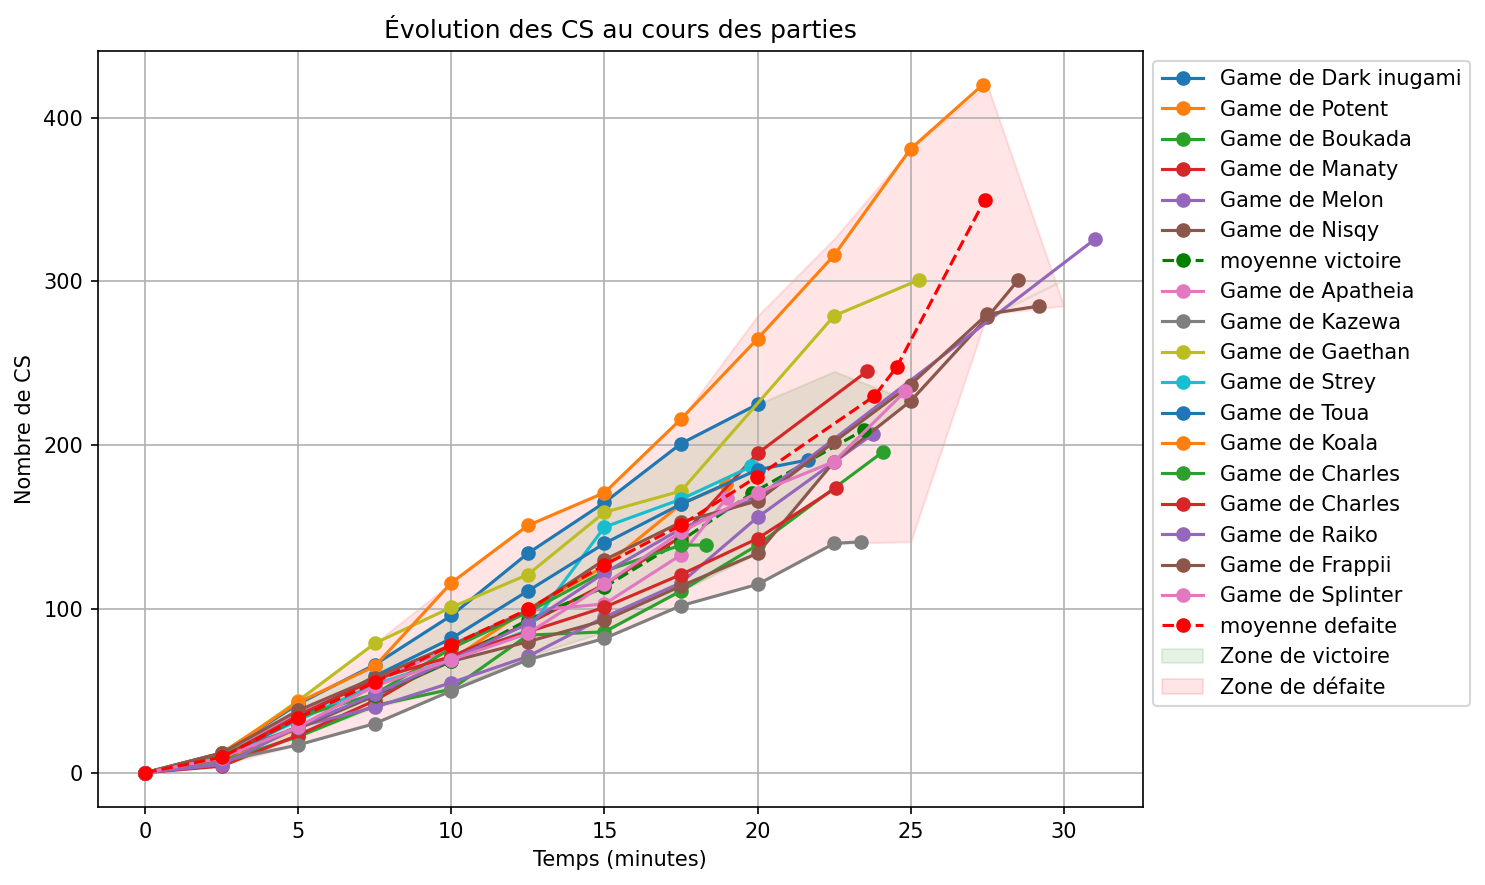

In [5]:
plt.figure(figsize=(10,6),dpi=150)

for index_game, game in victoire.iterrows():
    plt.plot(victoire["Temps numérique"][index_game], victoire["CS"][index_game], marker='o', label="Game de " + str(victoire["Nom du joueur"][index_game]))

lib.moyennes(victoire, plt, "CS", label = "moyenne victoire")

for index_game, game in defaite.iterrows():
    plt.plot(defaite["Temps numérique"][index_game], defaite["CS"][index_game], marker='o', label="Game de " + str(defaite["Nom du joueur"][index_game]))

lib.moyennes(defaite, plt, "CS", label = "moyenne defaite", color = "red")

lib.zone(victoire, "CS", label='Zone de victoire', color='green')
lib.zone(defaite, "CS", label='Zone de défaite', color='red')

plt.title('Évolution des CS au cours des parties')
plt.xlabel('Temps (minutes)')
plt.ylabel('Nombre de CS')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()

plt.tight_layout()
plt.show()

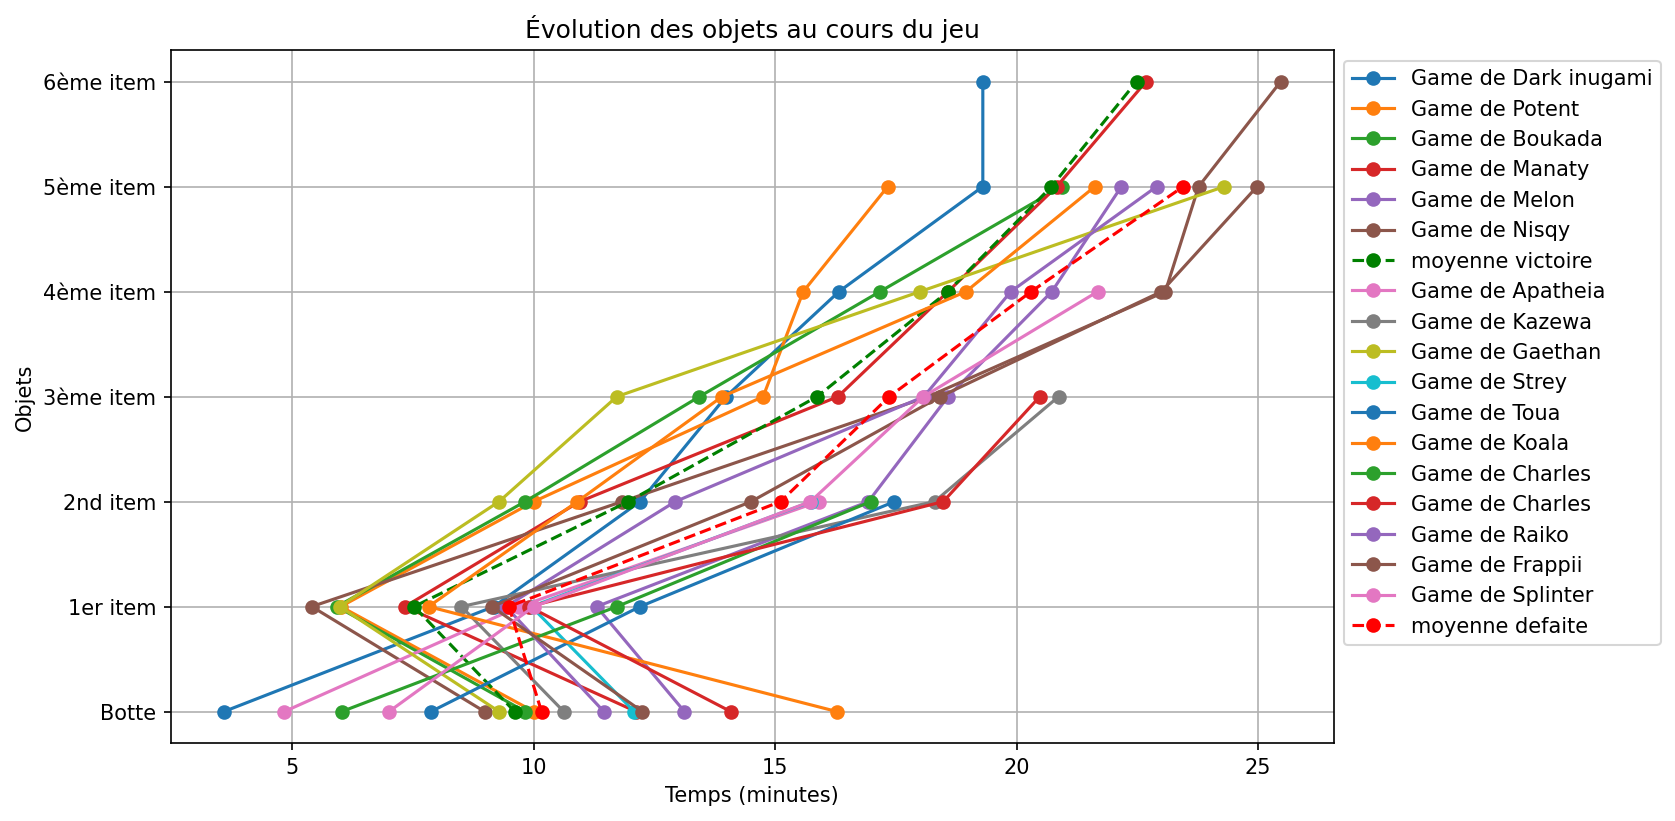

In [6]:
plt.figure(figsize=(10, 6), dpi=150)

for index_game, game in victoire.iterrows():
    plt.plot(victoire["Temps numérique objets"][index_game], victoire["Objets"][index_game], marker='o', linestyle='-', label="Game de " + str(victoire["Nom du joueur"][index_game]))#, color = "green")

lib.moyenne(victoire, "Temps numérique objets", label = "moyenne victoire", color = "green")

for index_game, game in defaite.iterrows():
    plt.plot(defaite["Temps numérique objets"][index_game], defaite["Objets"][index_game], marker='o', linestyle='-', label="Game de " + str(defaite["Nom du joueur"][index_game]))#, color = "red")

lib.moyenne(defaite, "Temps numérique objets", label = "moyenne defaite", color = "red")

plt.title('Évolution des objets au cours du jeu')
plt.xlabel('Temps (minutes)')
plt.ylabel('Objets')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

In [7]:
print("Durée moyenne des parties victorieuses :", victoire["Vrai temps"].mean())
print("Durée moyenne des parties perdantes :", defaite["Vrai temps"].mean())

Durée moyenne des parties victorieuses : 23.194444445000002
Durée moyenne des parties perdantes : 23.87727272636364


In [8]:
print("KDA moyen des parties victorieuses :", victoire["KDA"].mean())
print("KDA moyen des parties perdantes :", defaite["KDA"].mean())

KDA moyen des parties victorieuses : 17.166666666666668
KDA moyen des parties perdantes : 4.1571428571428575


In [9]:
print("Nombre de tours perdues moyen des parties victorieuses :", victoire["Nombre de tours perdues"].mean())
print("Nombre de tours perdues moyen des parties perdantes :", defaite["Nombre de tours perdues"].mean())

Nombre de tours perdues moyen des parties victorieuses : 6.666666666666667
Nombre de tours perdues moyen des parties perdantes : 10.090909090909092


In [10]:
print("Nombre d'inibiteur perdus moyen des parties victorieuses :", victoire["Nombre d'inibiteur perdus"].mean())
print("Nombre d'inibiteur perdus moyen des parties perdantes :", defaite["Nombre d'inibiteur perdus"].mean())

Nombre d'inibiteur perdus moyen des parties victorieuses : 0.5
Nombre d'inibiteur perdus moyen des parties perdantes : 2.1818181818181817


In [11]:
print("Nombres de tours détruite moyen des parties victorieuses :", victoire["Nombres de tours détruite"].mean())
print("Nombres de tours détruite moyen des parties perdantes :", defaite["Nombres de tours détruite"].mean())

#Prise d'objectif très très important plus que le farm donc perso split push important
#defi encore plus difficile avec des mages qui font pas mal aux tours

Nombres de tours détruite moyen des parties victorieuses : 6.5
Nombres de tours détruite moyen des parties perdantes : 1.0909090909090908


In [12]:
print("Nombre d'inibiteur détruit moyen des parties victorieuses :", victoire["Nombre d'inibiteur détruit"].mean())
print("Nombre d'inibiteur détruit moyen des parties perdantes :", defaite["Nombre d'inibiteur détruit"].mean())

#Un seul inib détruit donc il vaut mieux se concentrer sur la destruction d'une seule lane plutôt que plusieurs

Nombre d'inibiteur détruit moyen des parties victorieuses : 1.0
Nombre d'inibiteur détruit moyen des parties perdantes : 0.2727272727272727


In [13]:
print("Cs/min moyen des parties victorieuses :", victoire["Cs/min"].mean())
print("Cs/min moyen des parties perdantes :", defaite["Cs/min"].mean())

#Le farm n'est pas décisif?

Cs/min moyen des parties victorieuses : 9.698057706666667
Cs/min moyen des parties perdantes : 9.57134782590909


In [14]:
print("Gold total des parties victorieuses :", victoire["Gold total"].mean())
print("Gold total des parties perdantes :", defaite["Gold total"].mean())

Gold total des parties victorieuses : 22049.5
Gold total des parties perdantes : 13952.25


In [15]:
print("Gold/min moyen des parties victorieuses :", victoire["Gold/min"].mean())
print("Gold/min moyen des parties perdantes :", defaite["Gold/min"].mean())

Gold/min moyen des parties victorieuses : 962.5
Gold/min moyen des parties perdantes : 571.875


In [16]:
print("Temps première mort moyen des parties victorieuses :", victoire["Temps numérique première mort"].mean())
print("Temps première mort moyen des parties perdantes :", defaite["Temps numérique première mort"].mean())

#Donc fight assez tot mais il faudrait savoir qui meurt !

Temps première mort moyen des parties victorieuses : 4.944
Temps première mort moyen des parties perdantes : 6.113636363636363
